# Import Libraries

In [1]:
# Import Libraries yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Read Data Excel 

In [3]:
df = pd.read_excel('./Learning Style Mahasiswa IT Del Prediction menggunakan Felder-Silverman Learning Style Model.xlsx')

# 5 Baris Data Frame

In [4]:
# Menampilkan 5 baris pertama dari dataframe
df.head()

,Timestamp,Nama Lengkap Mahasiswa,NIM LENGKAP,Fakultas Mahasiswa,Program Studi Mahasiswa,Angkatan,Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya.,"Saat belajar, saya lebih suka berinteraksi atau berdiskusi dengan orang lain daripada belajar sendiri.",Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan,Saya lebih nyaman mempelajari sesuatu dengan diskusi langsung atau melakukan praktik,...,"Saat belajar di asrama, saya lebih nyaman mempelajari detail-detail spesifik dari materi",Saya lebih mudah memahami materi pelajaran jika penjelasannya disertai contoh-contoh praktis atau studi kasus yang nyata,"Sejauh mana merasa materi visual, membantu anda dalam memahami konsep besar dalam matakuliah secara menyeluruh?","Seberapa efektif urutan langkah - langkah pembelajaran yang diberikan secara visual, dalam membantu anda memahami materi?",Seberapa efektif penjelasan verbal tahap demi tahap dalam mendukung pemahaman anda pada setiap topik matakuliah?,Seberapa efektif tahapan latihan yang dilakukan di dalam kelas untuk meningkatkan pemahaman anda terhadap materi yang diajarkan?,Sejauh mana materi teks secara bertahap membantu anda memahami konsep secara menyeluruh?,Seberapa efektif anda merefleksikan konsep - konsep dalam setiap tahapan untuk memahami keseluruhan materi?,Seberapa efektif urutan materi membantu anda dalam memahami setiap tahapan - tahapan pembelajaran?,NILAI RATA2 IPK
0,2024-11-07 10:26:20.423,Deby Cynthia Rohara Manalu,11422047,Fakultas Vokasi,DIV Teknologi Rekayasa Perangkat Lunak,2022,Setuju,Netral,Setuju,Setuju,...,Netral,Setuju,Cukup membantu,Cukup efektif,Cukup efektif,Cukup efektif,Membantu,Cukup efektif,Efektif,2.74
1,2024-11-12 14:48:02.254,Ruben Sibarani,42224037,Fakultas Vokasi,DIII Teknologi Informasi,2024,Setuju,Netral,Setuju,Setuju,...,Setuju,Setuju,Membantu,Efektif,Efektif,Efektif,Membantu,Efektif,Efektif,3.76
2,2024-11-12 15:28:02.159,Oktova Yoga Praditia Samosir,42324001,Fakultas Vokasi,DIII Teknologi Informasi,2024,Setuju,Setuju,Setuju,Setuju,...,Setuju,Setuju,Membantu,Efektif,Efektif,Efektif,Membantu,Efektif,Efektif,3.76
3,2024-11-14 08:44:24.573,Brahmana Purba,42324002,Fakultas Vokasi,DIII Teknologi Informasi,2024,Setuju,Netral,Netral,Setuju,...,Netral,Sangat Setuju,Cukup membantu,Efektif,Cukup efektif,Efektif,Cukup membantu,Cukup efektif,Cukup efektif,2.43
4,2024-11-11 10:39:12.320,Andre Christian Saragih,11S23026,Fakultas Informatika dan Teknik Elektro (FITE),S1 Informatika,2024,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,...,Sangat Setuju,Sangat Setuju,Sangat membantu,Sangat efektif,Sangat efektif,Sangat efektif,Sangat membantu,Sangat efektif,Sangat efektif,2.65


# Melihat Daftar Kolom pada Dataset

In [5]:
df.columns

Index(['Timestamp', 'Nama Lengkap Mahasiswa', 'NIM LENGKAP',
       'Fakultas Mahasiswa', 'Program Studi Mahasiswa ', 'Angkatan',
       'Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya. ',
       'Saat belajar, saya lebih suka berinteraksi atau berdiskusi dengan orang lain daripada belajar sendiri. ',
       'Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan',
       'Saya lebih nyaman mempelajari sesuatu dengan diskusi langsung atau melakukan praktik',
       'Saya merasa lebih produktif ketika bekerja sama dengan orang lain dibandingkan belajar sendiri',
       'Saya sering memikirkan ulang atau merenungkan informasi baru sebelum benar-benar memahami',
       'Saya cenderung memproses informasi dengan cara merenungkan konsep sebelum mengambil tindakan',
       'Saya lebih suka mencoba sesuatu terlebih dahulu dan memikirkannya kemudian',
       'Saya merasa lebih baik belajar melalui praktik langsung daripada hanya membaca atau

# Menghitung Jumlah Baris Tersisa

In [6]:
jumlah_baris_tersisa=df.shape[0]
jumlah_baris_tersisa

654

# Menghitung Jumlah Kolom Tersisa

In [7]:
jumlah_kolom_tersisa=df.shape[1]
jumlah_kolom_tersisa

36

# Mencari Data Duplicate

In [9]:
df=df.drop_duplicates(subset='NIM LENGKAP', keep='last')

# Menghitung Jumlah Baris Tersisa

In [10]:
jumlah_baris_tersisa=df.shape[0]
jumlah_baris_tersisa

583

# Menghitung Jumlah Kolom Tersisa

In [11]:
jumlah_kolom_tersisa=df.shape[1]
jumlah_kolom_tersisa

36

# Menghapus kolom yang tidak relevan

In [12]:

df = df.drop(columns=['Timestamp', 'Nama Lengkap Mahasiswa', 'NIM LENGKAP', 'Fakultas Mahasiswa', 'Program Studi Mahasiswa '])

In [22]:
kolom_tidak_diubah = [df.columns[0], df.columns[-1]]

In [24]:
kolom_untuk_diubah = [col for col in df.columns if col not in kolom_tidak_diubah]

In [26]:
column_mapping = {f"Q{i+1}": col for i, col in enumerate(kolom_untuk_diubah)}

In [30]:
df_renamed = df.rename(columns={v: k for k, v in column_mapping.items()})

# Mengubah dan Menyusun Ulang Nama Kolom pada Dataframe

In [32]:
# Ubah nama kolom di dataframe menjadi Q1, Q2, dst.
df_display = df.copy()
df_display.rename(columns={v: k for k, v in column_mapping.items()}, inplace=True)

# Susun ulang kolom agar kolom pertama dan terakhir tetap di tempatnya
df_display = df_display[kolom_tidak_diubah + list(column_mapping.keys())]

# Menampilkan dataframe dengan nama kolom Q1, Q2, dst.
print("Dataset dengan nama kolom yang disingkat:")
display(df_display.head())

# Menampilkan nama asli kolom untuk referensi
print("\nMapping nama asli kolom untuk referensi:")
for alias, original in column_mapping.items():
    print(f"{alias} -> {original}")

Dataset dengan nama kolom yang disingkat:


,Angkatan,NILAI RATA2 IPK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
0,2022,2.74,Setuju,Netral,Setuju,Setuju,Netral,Netral,Netral,Netral,...,Tidak Setuju,Netral,Setuju,Cukup membantu,Cukup efektif,Cukup efektif,Cukup efektif,Membantu,Cukup efektif,Efektif
1,2024,3.76,Setuju,Netral,Setuju,Setuju,Setuju,Setuju,Setuju,Tidak Setuju,...,Netral,Setuju,Setuju,Membantu,Efektif,Efektif,Efektif,Membantu,Efektif,Efektif
2,2024,3.76,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,...,Setuju,Setuju,Setuju,Membantu,Efektif,Efektif,Efektif,Membantu,Efektif,Efektif
3,2024,2.43,Setuju,Netral,Netral,Setuju,Netral,Setuju,Netral,Netral,...,Netral,Netral,Sangat Setuju,Cukup membantu,Efektif,Cukup efektif,Efektif,Cukup membantu,Cukup efektif,Cukup efektif
4,2024,2.65,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,...,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat membantu,Sangat efektif,Sangat efektif,Sangat efektif,Sangat membantu,Sangat efektif,Sangat efektif



Mapping nama asli kolom untuk referensi:
Q1 -> Saya lebih suka mencoba sesuatu secara langsung daripada hanya memikirkannya. 
Q2 -> Saat belajar, saya lebih suka berinteraksi atau berdiskusi dengan orang lain daripada belajar sendiri. 
Q3 -> Saya lebih suka memikirkan hal-hal secara mendalam sebelum mengambil tindakan
Q4 -> Saya lebih nyaman mempelajari sesuatu dengan diskusi langsung atau melakukan praktik
Q5 -> Saya merasa lebih produktif ketika bekerja sama dengan orang lain dibandingkan belajar sendiri
Q6 -> Saya sering memikirkan ulang atau merenungkan informasi baru sebelum benar-benar memahami
Q7 -> Saya cenderung memproses informasi dengan cara merenungkan konsep sebelum mengambil tindakan
Q8 -> Saya lebih suka mencoba sesuatu terlebih dahulu dan memikirkannya kemudian
Q9 -> Saya merasa lebih baik belajar melalui praktik langsung daripada hanya membaca atau mendengarkan
Q10 -> Saya sering menggunakan diagram atau grafik untuk membantu pemahaman saya saat belajar
Q11 -> Saya le

In [34]:
import pandas as pd

# Mengatur Pandas agar menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Menampilkan 5 baris pertama dengan semua kolom
df_display.head()


,Angkatan,NILAI RATA2 IPK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
0,2022,2.74,Setuju,Netral,Setuju,Setuju,Netral,Netral,Netral,Netral,Setuju,Tidak Setuju,Setuju,Setuju,Setuju,Netral,Setuju,Setuju,Setuju,Netral,Netral,Tidak Setuju,Netral,Setuju,Cukup membantu,Cukup efektif,Cukup efektif,Cukup efektif,Membantu,Cukup efektif,Efektif
1,2024,3.76,Setuju,Netral,Setuju,Setuju,Setuju,Setuju,Setuju,Tidak Setuju,Setuju,Tidak Setuju,Setuju,Tidak Setuju,Setuju,Tidak Setuju,Setuju,Setuju,Setuju,Netral,Tidak Setuju,Netral,Setuju,Setuju,Membantu,Efektif,Efektif,Efektif,Membantu,Efektif,Efektif
2,2024,3.76,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Membantu,Efektif,Efektif,Efektif,Membantu,Efektif,Efektif
3,2024,2.43,Setuju,Netral,Netral,Setuju,Netral,Setuju,Netral,Netral,Setuju,Tidak Setuju,Netral,Netral,Netral,Setuju,Setuju,Setuju,Setuju,Netral,Netral,Netral,Netral,Sangat Setuju,Cukup membantu,Efektif,Cukup efektif,Efektif,Cukup membantu,Cukup efektif,Cukup efektif
4,2024,2.65,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,Sangat setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat membantu,Sangat efektif,Sangat efektif,Sangat efektif,Sangat membantu,Sangat efektif,Sangat efektif


In [36]:
from sklearn.impute import SimpleImputer

# Menggunakan SimpleImputer untuk mengisi nilai NaN dengan nilai yang paling sering muncul di setiap kolom
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [38]:
# Menghitung Jumlah Baris Tersisa
jumlah_baris_tersisa=df.shape[0]
jumlah_baris_tersisa

583

In [40]:
from sklearn.preprocessing import LabelEncoder

# Melakukan encoding untuk setiap kolom yang berisi data kategorikal
label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le  # Menyimpan encoder untuk interpretasi di kemudian hari


In [42]:
# # Melihat beberapa baris setelah preprocessing
# print(data_imputed.head())

# # Melihat statistik dasar data
# print(data_imputed.describe())

# # Memastikan data sudah numerik dan tidak ada nilai kosong
# print(data_imputed.info())


In [44]:
# Menghilangkan spasi ekstra pada nama kolom
df.columns = df.columns.str.strip()

In [46]:
# Active or Reflective
active_reflective_columns = [
    'Q1',
    'Q2',
    'Q3',
    'Q4',
    'Q5',
    'Q6',
    'Q7',
    'Q8'
]

# Memilih data yang sesuai dengan gaya belajar Active or Reflective
active_reflective_data = df_display[active_reflective_columns]

# Visual or Verbal
visual_verbal_columns = [
    'Q9',
    'Q10',
    'Q11',
    'Q12',
    'Q13'
]

# Memilih data yang sesuai dengan gaya belajar Visual or Verbal
visual_verbal_data = df_display[visual_verbal_columns]

# Sensing or Intuitive
sensing_intuitive_columns = [
    'Q14',
    'Q15',
       'Q16',
       'Q17',
       'Q18',
       'Q19',
       'Q20',
       'Q21',
       'Q22'
]

# Memilih data yang sesuai dengan gaya belajar Sensing or Intuitive
sensing_intuitive_data = df_display[sensing_intuitive_columns]

# Sequential or Global
sequential_global_columns = [
     'Q23',
       'Q24',
       'Q25',
       'Q26',
       'Q27',
       'Q28',
       'Q29'
]

# Memilih data yang sesuai dengan gaya belajar Sequential or Global
sequential_global_data = df_display[sequential_global_columns]


In [48]:
print(df_display.dtypes)

Angkatan             int64
NILAI RATA2 IPK    float64
Q1                  object
Q2                  object
Q3                  object
Q4                  object
Q5                  object
Q6                  object
Q7                  object
Q8                  object
Q9                  object
Q10                 object
Q11                 object
Q12                 object
Q13                 object
Q14                 object
Q15                 object
Q16                 object
Q17                 object
Q18                 object
Q19                 object
Q20                 object
Q21                 object
Q22                 object
Q23                 object
Q24                 object
Q25                 object
Q26                 object
Q27                 object
Q28                 object
Q29                 object
dtype: object


In [50]:
# Mapping untuk kategori ke numerik
mapping_agreement = {
    'sangat setuju': 5,
    'setuju': 4,
    'netral': 3,
    'tidak setuju': 2,
    'sangat tidak setuju': 1
}

mapping_helpfulness = {
    'sangat membantu': 5,
    'membantu': 4,
    'cukup membantu': 3,
    'tidak membantu': 2,
    'tidak membantu sama sekali': 1
}

mapping_effectiveness = {
    'sangat efektif': 5,
    'efektif': 4,
    'cukup efektif': 3,
    'tidak efektif': 2,
    'tidak efektif sama sekali': 1
}

# Fungsi mapping untuk menangani spasi ekstra dan perbedaan kapitalisasi
def safe_map(value, mapping):
    cleaned_value = value.strip().lower()  # Menghilangkan spasi ekstra dan membuat huruf kecil
    if cleaned_value not in mapping:
        print(f"Unmapped value: '{value}'")  # Menampilkan nilai yang tidak ter-mapping
    return mapping.get(cleaned_value, np.nan)

    
# Pastikan pemetaan berjalan dengan benar untuk kolom yang relevan
df_display['Active_Reflective'] = active_reflective_data.apply(lambda col: col.map(lambda x: safe_map(x, mapping_agreement))).mean(axis=1)
df_display['Visual_Verbal'] = visual_verbal_data.apply(lambda col: col.map(lambda x: safe_map(x, mapping_agreement))).mean(axis=1)
df_display['Sensing_Intuitive'] = sensing_intuitive_data.apply(lambda col: col.map(lambda x: safe_map(x, mapping_agreement))).mean(axis=1)

# Mapping untuk Sequential_Global (menggabungkan mapping_helpfulness dan mapping_effectiveness)
df_display['Sequential_Global'] = sequential_global_data.apply(
    lambda col: col.map(lambda x: safe_map(x, mapping_helpfulness) if 'membantu' in x.lower() else safe_map(x, mapping_effectiveness))
).mean(axis=1)

In [52]:
import pandas as pd
import numpy as np

# Buat dictionary untuk menyimpan rata-rata setiap kategori
results = {}

# Fungsi untuk menghitung rata-rata jawaban 1-5 untuk setiap pertanyaan
def calculate_average_per_question(data, questions, mapping):
    averages = {}
    for question in questions:
        counts = data[question].map(lambda x: safe_map(x, mapping)).value_counts(normalize=True).sort_index()
        question_avg = {score: counts.get(score, 0) for score in range(1, 6)}  # Pastikan semua skor (1-5) tercakup
        averages[question] = question_avg
    return averages

# Fungsi untuk menghitung rata-rata setiap kategori gaya belajar
def calculate_learning_style_average(data, questions, mapping):
    mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
    return mapped_data.mean(axis=1).mean()  # Rata-rata per baris, lalu rata-rata keseluruhan

# Perhitungan rata-rata per pertanyaan untuk Active_Reflective
results['Active_Reflective_Question_Averages'] = calculate_average_per_question(
    df_display, active_reflective_columns, mapping_agreement
)
results['Active_Reflective_Average'] = calculate_learning_style_average(
    df_display, active_reflective_columns, mapping_agreement
)

# Perhitungan rata-rata per pertanyaan untuk Visual_Verbal
results['Visual_Verbal_Question_Averages'] = calculate_average_per_question(
    df_display, visual_verbal_columns, mapping_agreement
)
results['Visual_Verbal_Average'] = calculate_learning_style_average(
    df_display, visual_verbal_columns, mapping_agreement
)

# Perhitungan rata-rata per pertanyaan untuk Sensing_Intuitive
results['Sensing_Intuitive_Question_Averages'] = calculate_average_per_question(
    df_display, sensing_intuitive_columns, mapping_agreement
)
results['Sensing_Intuitive_Average'] = calculate_learning_style_average(
    df_display, sensing_intuitive_columns, mapping_agreement
)

# Perhitungan rata-rata per pertanyaan untuk Sequential_Global
def calculate_sequential_global_average(data, questions):
    mapped_data = data[questions].applymap(
        lambda x: safe_map(x, mapping_helpfulness) if 'membantu' in x.lower() else safe_map(x, mapping_effectiveness)
    )
    return mapped_data.mean(axis=1).mean()

results['Sequential_Global_Question_Averages'] = calculate_average_per_question(
    df_display, sequential_global_columns, {**mapping_helpfulness, **mapping_effectiveness}
)
results['Sequential_Global_Average'] = calculate_sequential_global_average(
    df_display, sequential_global_columns
)

# Menampilkan hasil
for category, averages in results.items():
    if isinstance(averages, dict):  # Jika hasil adalah dictionary (per pertanyaan)
        print(f"{category}:")
        for question, distribution in averages.items():
            print(f"  {question}: {distribution}")
    else:  # Jika hasil adalah rata-rata kategori
        print(f"{category}: {averages:.2f}")

Active_Reflective_Question_Averages:
  Q1: {1: 0.0017152658662092624, 2: 0.032590051457975985, 3: 0.1680960548885077, 4: 0.44939965694682676, 5: 0.3481989708404803}
  Q2: {1: 0.00686106346483705, 2: 0.07032590051457976, 3: 0.3584905660377358, 4: 0.34991423670668953, 5: 0.2144082332761578}
  Q3: {1: 0.0017152658662092624, 2: 0.008576329331046312, 3: 0.2332761578044597, 4: 0.5060034305317325, 5: 0.2504288164665523}
  Q4: {1: 0.0017152658662092624, 2: 0.010291595197255575, 3: 0.19897084048027444, 4: 0.4614065180102916, 5: 0.3276157804459691}
  Q5: {1: 0.015437392795883362, 2: 0.07032590051457976, 3: 0.379073756432247, 4: 0.3704974271012007, 5: 0.1646655231560892}
  Q6: {1: 0, 2: 0.005145797598627788, 3: 0.2109777015437393, 4: 0.5334476843910806, 5: 0.2504288164665523}
  Q7: {1: 0, 2: 0.012006861063464836, 3: 0.23842195540308747, 4: 0.5454545454545454, 5: 0.20411663807890223}
  Q8: {1: 0.010291595197255575, 2: 0.12521440823327615, 3: 0.28987993138936535, 4: 0.41852487135506006, 5: 0.156089

C:\Users\vlen\AppData\Local\Temp\ipykernel_27920\2889890750.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
C:\Users\vlen\AppData\Local\Temp\ipykernel_27920\2889890750.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
C:\Users\vlen\AppData\Local\Temp\ipykernel_27920\2889890750.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
C:\Users\vlen\AppData\Local\Temp\ipykernel_27920\2889890750.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(


In [54]:
# Pilih hanya kolom yang namanya dimulai dengan 'Q' (kolom pertanyaan)
question_columns = df_display.columns[df_display.columns.str.startswith('Q')]

# Loop melalui semua kolom pertanyaan
for column in question_columns:
    print(f"\nDistribusi jawaban untuk '{column}':")
    distribution = df_display[column].value_counts().sort_index()
    for value, count in distribution.items():
        print(f"  Jawaban {value}: {count}")


Distribusi jawaban untuk 'Q1':
  Jawaban Netral: 98
  Jawaban Sangat Tidak Setuju: 1
  Jawaban Sangat setuju: 203
  Jawaban Setuju: 262
  Jawaban Tidak Setuju: 19

Distribusi jawaban untuk 'Q2':
  Jawaban Netral: 209
  Jawaban Sangat Tidak Setuju: 4
  Jawaban Sangat setuju: 125
  Jawaban Setuju: 204
  Jawaban Tidak Setuju: 41

Distribusi jawaban untuk 'Q3':
  Jawaban Netral: 136
  Jawaban Sangat Tidak Setuju: 1
  Jawaban Sangat setuju: 146
  Jawaban Setuju: 295
  Jawaban Tidak Setuju: 5

Distribusi jawaban untuk 'Q4':
  Jawaban Netral: 116
  Jawaban Sangat Tidak Setuju: 1
  Jawaban Sangat setuju: 191
  Jawaban Setuju: 269
  Jawaban Tidak Setuju: 6

Distribusi jawaban untuk 'Q5':
  Jawaban Netral: 221
  Jawaban Sangat Tidak Setuju: 9
  Jawaban Sangat setuju: 96
  Jawaban Setuju: 216
  Jawaban Tidak Setuju: 41

Distribusi jawaban untuk 'Q6':
  Jawaban Netral: 123
  Jawaban Sangat setuju: 146
  Jawaban Setuju: 311
  Jawaban Tidak Setuju: 3

Distribusi jawaban untuk 'Q7':
  Jawaban Netral

In [56]:
# # Menghapus kolom yang tidak relevan
# df = df_display.drop(columns=['Angkatan'])

In [58]:
import pandas as pd

# # Gunakan data dari data_imputed
# df_display = pd.DataFrame(data_imputed)

# Tampilkan distribusi
print(df_display)


     Angkatan  NILAI RATA2 IPK                   Q1             Q2  \
0        2022             2.74               Setuju         Netral   
1        2024             3.76               Setuju         Netral   
2        2024             3.76               Setuju         Setuju   
3        2024             2.43               Setuju         Netral   
4        2024             2.65        Sangat setuju  Sangat setuju   
..        ...              ...                  ...            ...   
649      2024             3.98               Setuju         Setuju   
650      2024             2.26               Setuju         Setuju   
651      2022             2.35  Sangat Tidak Setuju         Netral   
652      2022             3.37               Netral         Netral   
653      2024             2.45               Netral         Setuju   

                Q3             Q4             Q5             Q6  \
0           Setuju         Setuju         Netral         Netral   
1           Setuju       

In [60]:
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(df, features):
    outliers = pd.DataFrame(columns=['Feature', 'Index', 'Value'])
    
    for feature in features:
        # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1  # Menghitung rentang interkuartil
        
        # Menentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifikasi outliers: data yang lebih kecil dari lower_bound atau lebih besar dari upper_bound
        outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        for idx in outlier_indices:
            outliers = pd.concat([outliers, pd.DataFrame({'Feature': [feature], 'Index': [idx], 'Value': [df.at[idx, feature]]})], ignore_index=True)
    
    return outliers  # Mengembalikan DataFrame dengan outliers yang terdeteksi

In [62]:
# Fungsi untuk deteksi dan penanganan outliers menggunakan IQR
def handle_outliers_iqr(df, features):
    for feature in features:
        # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1  # Menghitung rentang interkuartil
        
        # Menentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Gantikan outliers dengan nilai yang lebih sesuai (misalnya dengan median)
        df[feature] = np.where(df[feature] < lower_bound, df[feature].median(), df[feature])  # Gantikan dengan median jika kurang dari lower_bound
        df[feature] = np.where(df[feature] > upper_bound, df[feature].median(), df[feature])  # Gantikan dengan median jika lebih dari upper_bound
        
    return df  # Mengembalikan DataFrame setelah penanganan outliers

In [64]:
print(df_display.columns)

Index(['Angkatan', 'NILAI RATA2 IPK', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27',
       'Q28', 'Q29', 'Active_Reflective', 'Visual_Verbal', 'Sensing_Intuitive',
       'Sequential_Global'],
      dtype='object')


In [66]:
# Menambahkan kolom rata-rata untuk masing-masing kategori gaya belajar

# Menambahkan kolom rata-rata untuk masing-masing kategori gaya belajar
df_display['Active_Reflective_Average'] = calculate_learning_style_average(
    df_display, active_reflective_columns, mapping_agreement
)

df_display['Visual_Verbal_Average'] = calculate_learning_style_average(
    df_display, visual_verbal_columns, mapping_agreement
)

df_display['Sensing_Intuitive_Average'] = calculate_learning_style_average(
    df_display, sensing_intuitive_columns, mapping_agreement
)

df_display['Sequential_Global_Average'] = calculate_sequential_global_average(
    df_display, sequential_global_columns
)


C:\Users\vlen\AppData\Local\Temp\ipykernel_27920\2889890750.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
C:\Users\vlen\AppData\Local\Temp\ipykernel_27920\2889890750.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
C:\Users\vlen\AppData\Local\Temp\ipykernel_27920\2889890750.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(lambda x: safe_map(x, mapping))  # Mapping ke numerik
C:\Users\vlen\AppData\Local\Temp\ipykernel_27920\2889890750.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = data[questions].applymap(


In [68]:
print(df_display)

     Angkatan  NILAI RATA2 IPK                   Q1             Q2  \
0        2022             2.74               Setuju         Netral   
1        2024             3.76               Setuju         Netral   
2        2024             3.76               Setuju         Setuju   
3        2024             2.43               Setuju         Netral   
4        2024             2.65        Sangat setuju  Sangat setuju   
..        ...              ...                  ...            ...   
649      2024             3.98               Setuju         Setuju   
650      2024             2.26               Setuju         Setuju   
651      2022             2.35  Sangat Tidak Setuju         Netral   
652      2022             3.37               Netral         Netral   
653      2024             2.45               Netral         Setuju   

                Q3             Q4             Q5             Q6  \
0           Setuju         Setuju         Netral         Netral   
1           Setuju       

In [70]:
# Kolom yang ingin diperiksa untuk outliers
features_to_check = [
    'Active_Reflective_Average', 
    'Visual_Verbal_Average', 
    'Sensing_Intuitive_Average', 
    'Sequential_Global_Average'
]

# Deteksi outliers
outliers = detect_outliers_iqr(df_display, features_to_check)
print("Detected Outliers:")
print(outliers)

# Penanganan outliers
df_display = handle_outliers_iqr(df_display, features_to_check)

# Verifikasi setelah penanganan outliers
print("\nDataset setelah penanganan outliers:")
print(df_display.head())

Detected Outliers:
Empty DataFrame
Columns: [Feature, Index, Value]
Index: []

Dataset setelah penanganan outliers:
   Angkatan  NILAI RATA2 IPK             Q1             Q2             Q3  \
0      2022             2.74         Setuju         Netral         Setuju   
1      2024             3.76         Setuju         Netral         Setuju   
2      2024             3.76         Setuju         Setuju         Setuju   
3      2024             2.43         Setuju         Netral         Netral   
4      2024             2.65  Sangat setuju  Sangat setuju  Sangat setuju   

              Q4             Q5             Q6             Q7             Q8  \
0         Setuju         Netral         Netral         Netral         Netral   
1         Setuju         Setuju         Setuju         Setuju   Tidak Setuju   
2         Setuju         Setuju         Setuju         Setuju         Setuju   
3         Setuju         Netral         Setuju         Netral         Netral   
4  Sangat setuju  San

In [72]:
# Mapping ulang semua kolom relevan berdasarkan gaya belajar
for col in active_reflective_columns:
    df_display[col] = df_display[col].map(lambda x: safe_map(x, mapping_agreement))

for col in visual_verbal_columns:
    df_display[col] = df_display[col].map(lambda x: safe_map(x, mapping_agreement))

for col in sensing_intuitive_columns:
    df_display[col] = df_display[col].map(lambda x: safe_map(x, mapping_agreement))

for col in sequential_global_columns:
    # Menyesuaikan kolom 'Sequential_Global' berdasarkan 'helpfulness' dan 'effectiveness'
    df_display[col] = df_display[col].map(
        lambda x: safe_map(x, mapping_helpfulness) if 'membantu' in x.strip().lower() 
        else safe_map(x, mapping_effectiveness)
    )


In [74]:
import pandas as pd

# Mengatur Pandas agar menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Menampilkan 5 baris pertama dengan semua kolom
df_display.head()


,Angkatan,NILAI RATA2 IPK,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Active_Reflective,Visual_Verbal,Sensing_Intuitive,Sequential_Global,Active_Reflective_Average,Visual_Verbal_Average,Sensing_Intuitive_Average,Sequential_Global_Average
0,2022,2.74,4,3,4,4,3,3,3,3,4,2,4,4,4,3,4,4,4,3,3,2,3,4,3,3,3,3,4,3,4,3.375,3.6,3.333333,3.285714,3.882075,3.869297,3.839146,3.906641
1,2024,3.76,4,3,4,4,4,4,4,2,4,2,4,2,4,2,4,4,4,3,2,3,4,4,4,4,4,4,4,4,4,3.625,3.2,3.333333,4.000000,3.882075,3.869297,3.839146,3.906641
2,2024,3.76,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4.000,4.0,4.000000,4.000000,3.882075,3.869297,3.839146,3.906641
3,2024,2.43,4,3,3,4,3,4,3,3,4,2,3,3,3,4,4,4,4,3,3,3,3,5,3,4,3,4,3,3,3,3.375,3.0,3.666667,3.285714,3.882075,3.869297,3.839146,3.906641
4,2024,2.65,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5.000,5.0,5.000000,5.000000,3.882075,3.869297,3.839146,3.906641


In [75]:
print(df_display.dtypes)  # Menampilkan tipe data dari setiap kolom

Angkatan                       int64
NILAI RATA2 IPK              float64
Q1                             int64
Q2                             int64
Q3                             int64
Q4                             int64
Q5                             int64
Q6                             int64
Q7                             int64
Q8                             int64
Q9                             int64
Q10                            int64
Q11                            int64
Q12                            int64
Q13                            int64
Q14                            int64
Q15                            int64
Q16                            int64
Q17                            int64
Q18                            int64
Q19                            int64
Q20                            int64
Q21                            int64
Q22                            int64
Q23                            int64
Q24                            int64
Q25                            int64
Q

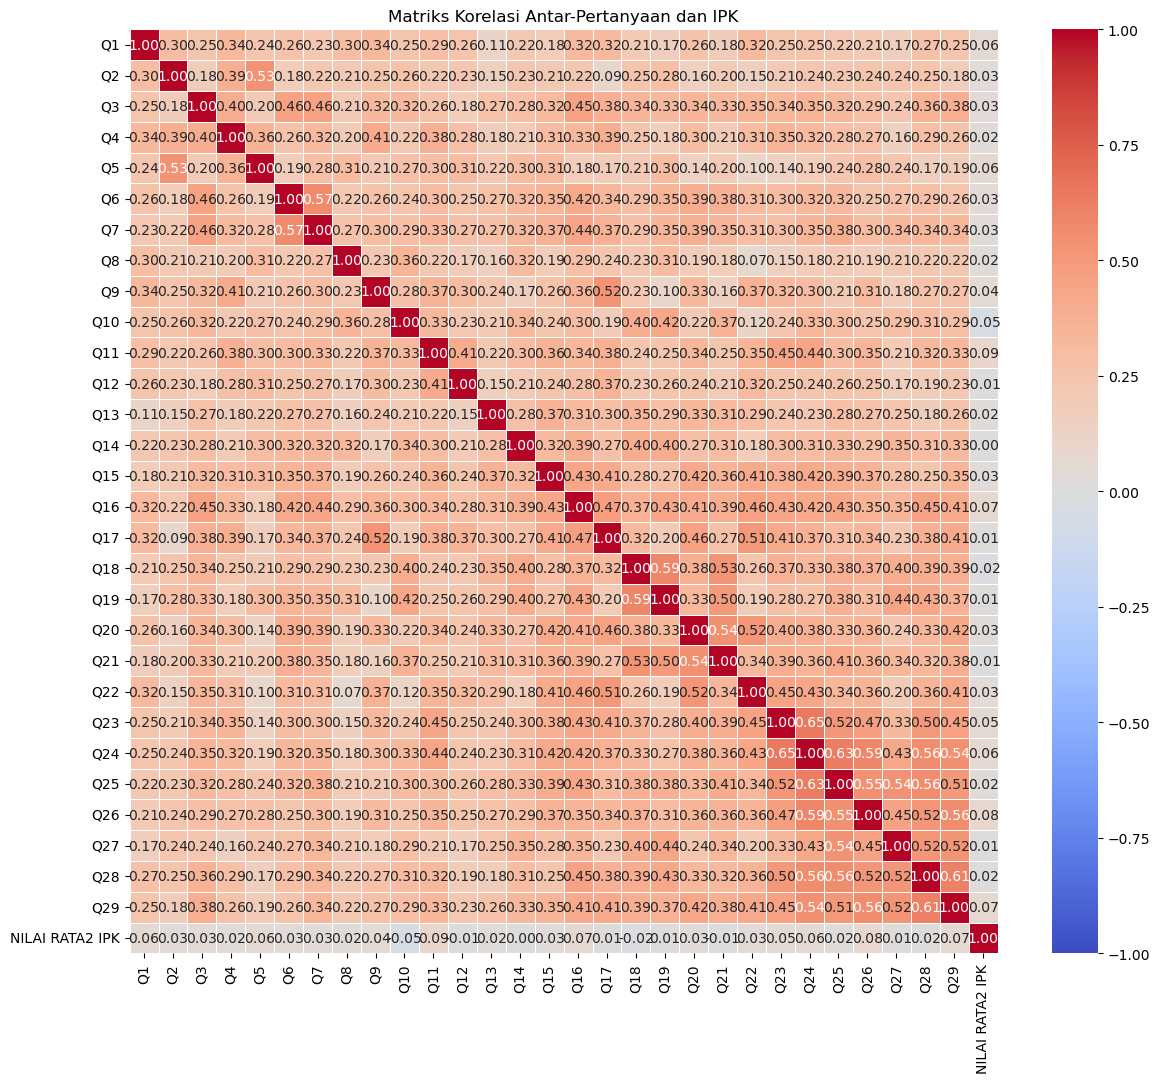

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil kolom pertanyaan dan menambahkan kolom IPK
question_columns_with_ipk = [col for col in df_display.columns if col.startswith('Q')] + ['NILAI RATA2 IPK']

# Menghitung matriks korelasi antar-pertanyaan dan IPK
correlation_questions_with_ipk = df_display[question_columns_with_ipk].corr()

# Menampilkan matriks korelasi dengan heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_questions_with_ipk, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriks Korelasi Antar-Pertanyaan dan IPK')
plt.show()

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Mengambil kolom yang relevan (misalnya, kolom pertanyaan)
question_columns_with_ipk = [col for col in df_display.columns if col.startswith('Q')] + ['NILAI RATA2 IPK']

# Menyaring data untuk kolom-kolom yang akan dinormalisasi (hanya kolom numerik)
df_normalized = df_display[question_columns_with_ipk].select_dtypes(include=[float, int])

# Menangani missing values jika ada (misalnya, dengan mengisi NaN dengan nilai rata-rata kolom)
df_normalized = df_normalized.fillna(df_normalized.mean())

# Normalisasi Z-Score pada semua kolom yang relevan
scaler = StandardScaler()

# Terapkan Z-Score normalization dan simpan hasilnya dalam salinan baru
normalized_values = scaler.fit_transform(df_normalized)

# Membuat DataFrame baru untuk hasil normalisasi
df_normalized_result = pd.DataFrame(normalized_values, columns=df_normalized.columns)

# Menampilkan data setelah normalisasi
print("Data Setelah Normalisasi (Z-Score):")
print(df_normalized_result.head())  # Menampilkan 5 baris pertama dari data setelah normalisasi


# Menghitung korelasi antar kolom setelah normalisasi
correlation_normalized = df_normalized_result.corr()



Data Setelah Normalisasi (Z-Score):
         Q1        Q2        Q3        Q4        Q5        Q6        Q7  \
0 -0.136157 -0.765873  0.007046 -0.136006 -0.668085 -1.483704 -1.349167   
1 -0.136157 -0.765873  0.007046 -0.136006  0.447942 -0.042038  0.083555   
2 -0.136157  0.336606  0.007046 -0.136006  0.447942 -0.042038  0.083555   
3 -0.136157 -0.765873 -1.362148 -0.136006 -0.668085 -0.042038 -1.349167   
4  1.104150  1.439085  1.376239  1.185517  1.563969  1.399627  1.516277   

         Q8        Q9       Q10       Q11       Q12       Q13       Q14  \
0 -0.628115 -0.207687 -1.580332  0.011349  0.136710  0.099687 -0.710873   
1 -1.701989 -0.207687 -1.580332  0.011349 -2.315664  0.099687 -1.951709   
2  0.445759 -0.207687  0.694566  0.011349  0.136710  0.099687  0.529962   
3 -0.628115 -0.207687 -1.580332 -1.311896 -1.089477 -1.191812  0.529962   
4  1.519633  1.137661  1.832015  1.334593  1.362897  1.391186  1.770798   

        Q15       Q16       Q17       Q18       Q19       Q20 

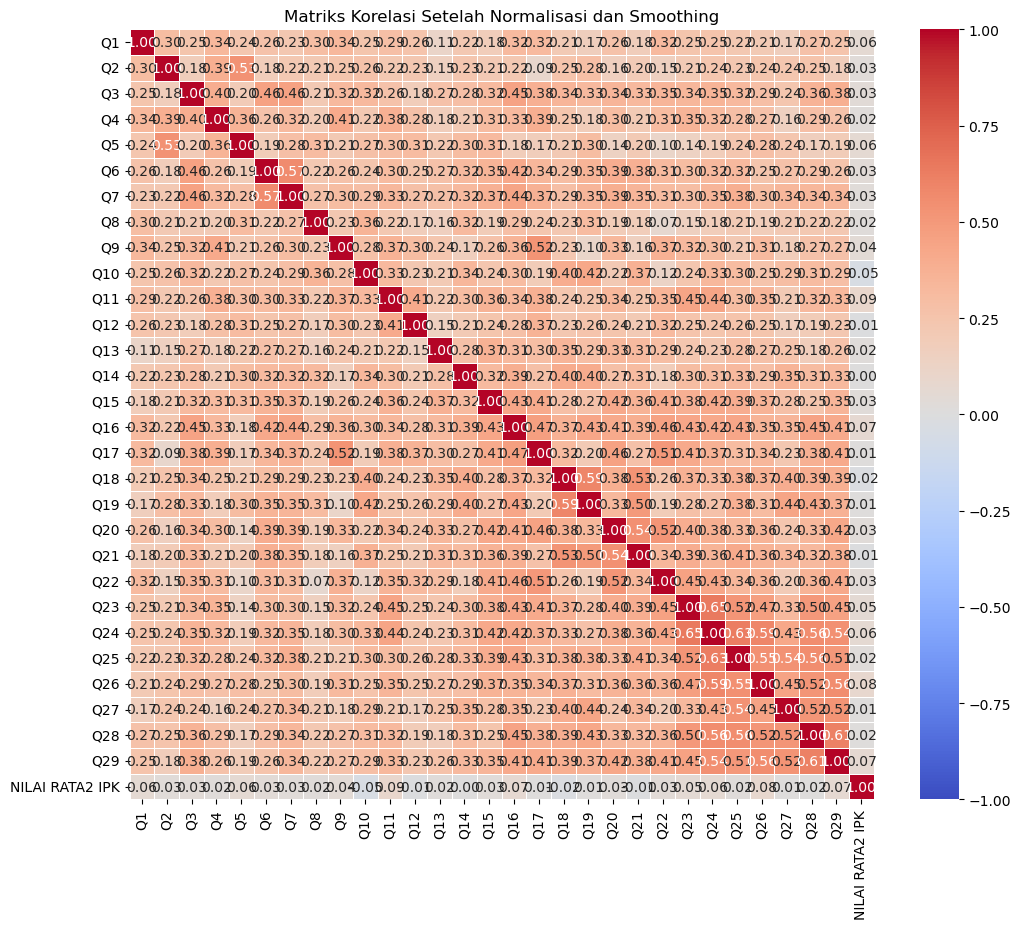

In [80]:
# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_normalized, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriks Korelasi Setelah Normalisasi dan Smoothing')
plt.show()

In [81]:
# df_display = df_display.drop_duplicates()

In [82]:
print(df_normalized_result.columns)


Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29',
       'NILAI RATA2 IPK'],
      dtype='object')


In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Active or Reflective
active_reflective_columns = [
    'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'
]
active_reflective_data = df_display[active_reflective_columns]

# Visual or Verbal
visual_verbal_columns = ['Q9', 'Q10', 'Q11', 'Q12', 'Q13']
visual_verbal_data = df_display[visual_verbal_columns]

# Sensing or Intuitive
sensing_intuitive_columns = ['Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22']
sensing_intuitive_data = df_display[sensing_intuitive_columns]

# Sequential or Global
sequential_global_columns = ['Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29']
sequential_global_data = df_display[sequential_global_columns]

# Menggabungkan semua data untuk clustering
df_for_clustering = pd.concat([active_reflective_data, visual_verbal_data, sensing_intuitive_data, sequential_global_data], axis=1)

# Menangani missing values (jika ada) dengan mengisi NaN menggunakan rata-rata kolom
df_for_clustering = df_for_clustering.fillna(df_for_clustering.mean())

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
normalized_values = scaler.fit_transform(df_for_clustering)

# Membuat DataFrame baru untuk hasil normalisasi
df_normalized_result = pd.DataFrame(normalized_values, columns=df_for_clustering.columns)

# K-Means Clustering dengan 4 cluster (untuk 4 gaya belajar)
kmeans = KMeans(n_clusters=4, random_state=42)
df_normalized_result['Cluster'] = kmeans.fit_predict(df_normalized_result)

# Menambahkan label gaya belajar berdasarkan cluster
cluster_labels = {
    0: 'Active and Visual',
    1: 'Reflective and Verbal',
    2: 'Sensing and Intuitive',
    3: 'Sequential and Global'
}

# Menambahkan label gaya belajar pada DataFrame asli
df_display['Gaya_Belajar'] = df_normalized_result['Cluster'].map(cluster_labels)

# Menampilkan hasil clustering
print(df_display[['Gaya_Belajar', 'NILAI RATA2 IPK']].head())

# Evaluasi Clustering dengan silhouette score
silhouette_avg = silhouette_score(df_normalized_result, df_normalized_result['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

            Gaya_Belajar  NILAI RATA2 IPK
0  Sensing and Intuitive             2.74
1  Sensing and Intuitive             3.76
2      Active and Visual             3.76
3  Sensing and Intuitive             2.43
4  Sequential and Global             2.65
Silhouette Score: 0.1579295986713512


C:\Users\vlen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [90]:
unique_clusters = df_display['Gaya_Belajar'].nunique()
print(f"Jumlah cluster yang terbentuk: {unique_clusters}")


Jumlah cluster yang terbentuk: 4


In [92]:
# Menggunakan nilai IPK sebagai fitur dan Gaya Belajar sebagai target
X = df_display[['NILAI RATA2 IPK']]  # Fitur: IPK
y = df_display['Gaya_Belajar']  # Target: Gaya Belajar


In [94]:
# Encode target variable (Gaya Belajar) ke dalam format numerik
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [96]:
# Bagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [98]:
# Definisikan parameter yang ingin dioptimalkan
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Inisialisasi model RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# GridSearchCV untuk mencari kombinasi terbaik dari hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari grid search
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)

# Menggunakan model terbaik dari RandomizedSearchCV untuk prediksi
best_rf = grid_search.best_estimator_

# Prediksi pada data testing
y_pred = best_rf.predict(X_test)

# Menampilkan hasil evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")

# Menggunakan label kelas yang benar untuk target_names
target_names = le.classes_.astype(str)  # Pastikan target_names adalah array of strings
print(classification_report(y_test, y_pred, target_names=target_names))


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters from GridSearchCV:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.3162393162393162
Classification Report:
                       precision    recall  f1-score   support

    Active and Visual       0.39      0.64      0.49        42
Reflective and Verbal       0.00      0.00      0.00        21
Sensing and Intuitive       0.29      0.32      0.31        31
Sequential and Global       0.00      0.00      0.00         8
                  nan       0.00      0.00      0.00        15

             accuracy                           0.32       117
            macro avg       0.14      0.19      0.16       117
         weighted avg       0.22      0.32      0.26       117



C:\Users\vlen\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [100]:
# 2. Membaca file data tes dengan dua sheet
file_test = './Data IPK.xlsx'

# Membaca kedua sheet dari file Excel
df_test_sheet1 = pd.read_excel(file_test, sheet_name='2020')  # Ganti 'Sheet1' dengan nama sheet yang sesuai
df_test_sheet2 = pd.read_excel(file_test, sheet_name='2019')  # Ganti 'Sheet2' dengan nama sheet yang sesuai

# Ganti nama kolom 'ipk_lulus' menjadi 'NILAI RATA2 IPK' di kedua sheet
df_test_sheet1.rename(columns={'ipk_lulus': 'NILAI RATA2 IPK'}, inplace=True)
df_test_sheet2.rename(columns={'ipk_lulus': 'NILAI RATA2 IPK'}, inplace=True)

# Menambahkan kolom prediksi gaya belajar ke data tes pada Sheet1
df_test_sheet1['Predicted_Cluster'] = best_rf.predict(df_test_sheet1[['NILAI RATA2 IPK']])

# Mengatasi prediksi yang mungkin menghasilkan kelas yang tidak valid (membatasi hasil prediksi menjadi 0, 1, 2, 3)
df_test_sheet1['Predicted_Cluster'] = df_test_sheet1['Predicted_Cluster'].apply(lambda x: x if x < 4 else 0)  # Mengubah kelas yang lebih besar dari 3 menjadi kelas 0

df_test_sheet1['Predicted_Gaya_Belajar'] = df_test_sheet1['Predicted_Cluster'].map(cluster_labels)

# Menambahkan kolom prediksi gaya belajar ke data tes pada Sheet2
df_test_sheet2['Predicted_Cluster'] = best_rf.predict(df_test_sheet2[['NILAI RATA2 IPK']])

# Mengatasi prediksi yang mungkin menghasilkan kelas yang tidak valid (membatasi hasil prediksi menjadi 0, 1, 2, 3)
df_test_sheet2['Predicted_Cluster'] = df_test_sheet2['Predicted_Cluster'].apply(lambda x: x if x < 4 else 0)  # Mengubah kelas yang lebih besar dari 3 menjadi kelas 0

df_test_sheet2['Predicted_Gaya_Belajar'] = df_test_sheet2['Predicted_Cluster'].map(cluster_labels)

# Menampilkan hasil prediksi untuk kedua sheet
print("\nHasil Prediksi Gaya Belajar dari Data Test (Angkatan 2020):")
print(df_test_sheet1[['NILAI RATA2 IPK', 'Predicted_Gaya_Belajar']])

print("\nHasil Prediksi Gaya Belajar dari Data Test (Angkatan 2019):")
print(df_test_sheet2[['NILAI RATA2 IPK', 'Predicted_Gaya_Belajar']])

# Menyimpan hasil prediksi ke file baru dengan dua sheet
with pd.ExcelWriter('Hasil_Prediksi_Gaya_Belajar_Tes.xlsx') as writer:
    df_test_sheet1.to_excel(writer, sheet_name='Angkatan 2020', index=False)
    df_test_sheet2.to_excel(writer, sheet_name='Angkatan 2019', index=False)

print("\nHasil prediksi telah disimpan di 'Hasil_Prediksi_Gaya_Belajar_Tes.xlsx'")


Hasil Prediksi Gaya Belajar dari Data Test (Angkatan 2020):
    NILAI RATA2 IPK Predicted_Gaya_Belajar
0              2.53      Active and Visual
1              2.58      Active and Visual
2              2.35      Active and Visual
3              2.91      Active and Visual
4              2.42  Sensing and Intuitive
..              ...                    ...
77             3.36      Active and Visual
78             3.41  Sensing and Intuitive
79             3.25      Active and Visual
80             3.21      Active and Visual
81             3.10  Sensing and Intuitive

[82 rows x 2 columns]

Hasil Prediksi Gaya Belajar dari Data Test (Angkatan 2019):
    NILAI RATA2 IPK Predicted_Gaya_Belajar
0              3.27      Active and Visual
1              3.38  Sensing and Intuitive
2              3.23      Active and Visual
3              3.50  Sensing and Intuitive
4              3.07      Active and Visual
..              ...                    ...
61             3.33      Active and Vi